In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model,dummy,metrics
from inspect import signature
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
ds = pd.read_csv('baseball.csv')
ds.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
ds.shape

(30, 17)

In [5]:
ds.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [6]:
# summary statistics
ds.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
ds.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
ds.info

<bound method DataFrame.info of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  2

In [9]:
# Summary Statistics
ds.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
# Exploring the Data variable
ds.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [11]:
ds.W.value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

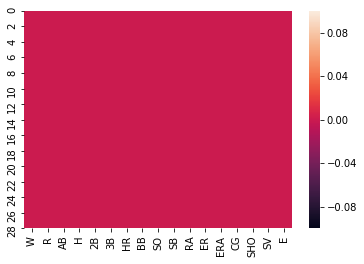

In [12]:
# DATA VISUALIZATION TO CHECK THE MISSING VALUES
sns.heatmap(ds.isnull())

In [13]:
# To check the correlation
dscor=ds.corr()
dscor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


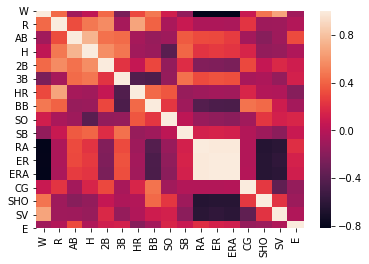

In [14]:
sns.heatmap(dscor)

In [15]:
sns.color_palette?

In [16]:
sns.heatmap?

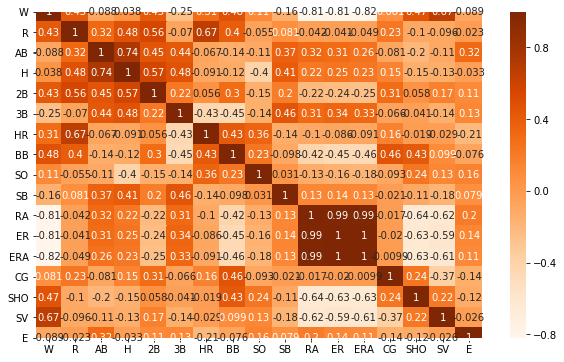

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(dscor,cmap='Oranges',annot=True)

In [18]:
# Plotting Outliers
ds.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

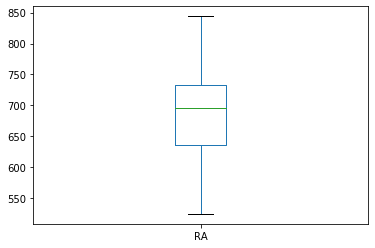

In [19]:
ds['RA'].plot.box()

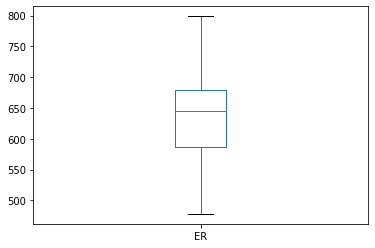

In [20]:
ds['ER'].plot.box()

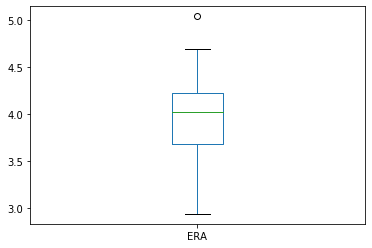

In [21]:
ds['ERA'].plot.box()

In [22]:
ds.shape

(30, 17)

In [23]:
collist=ds.columns.values
ncol=12
nrows=10

In [24]:
plt.subplot?

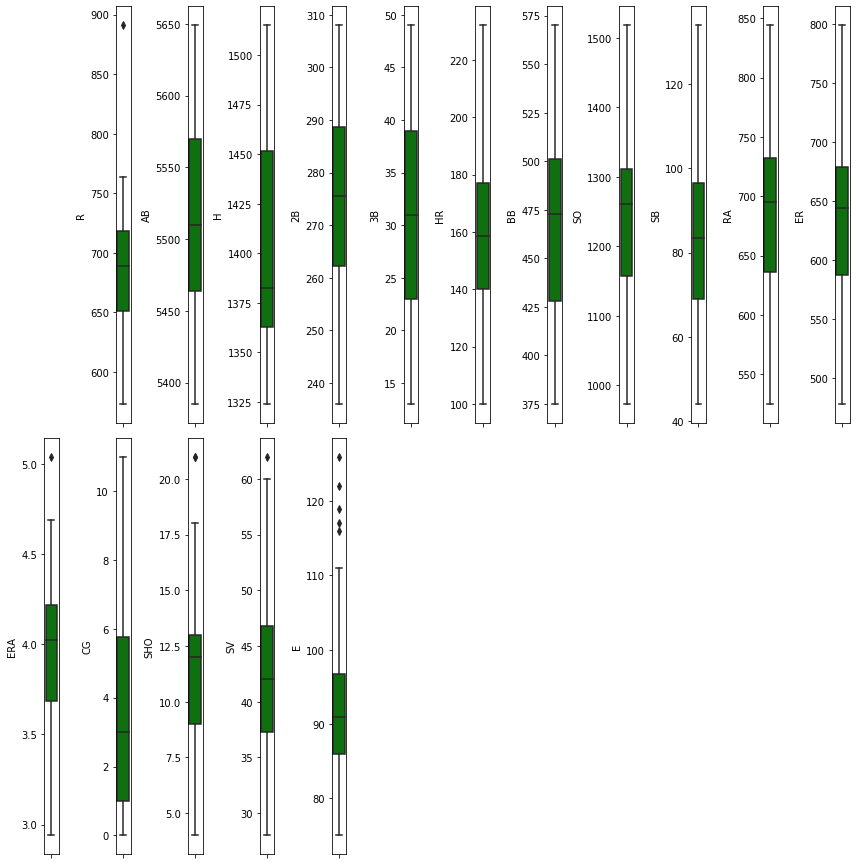

In [25]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(ds[collist[i]],color='green',orient='v')
    plt.tight_layout()

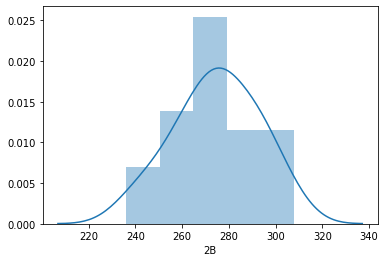

In [26]:
# To check the Distribution of Skewness
sns.distplot(ds['2B'])

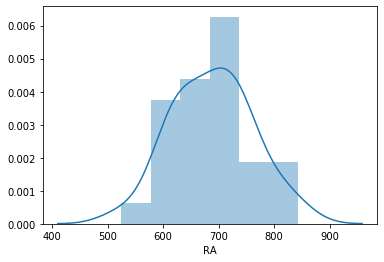

In [27]:
sns.distplot(ds['RA'])

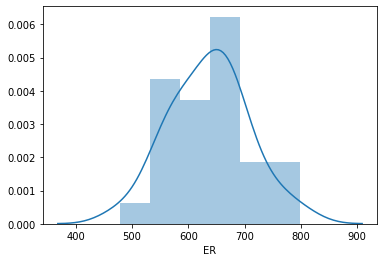

In [28]:
sns.distplot(ds['ER'])

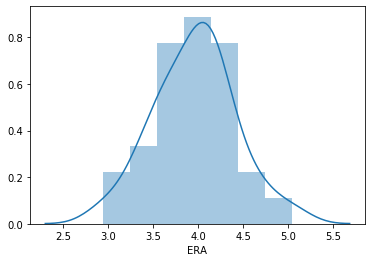

In [29]:
sns.distplot(ds['ERA'])

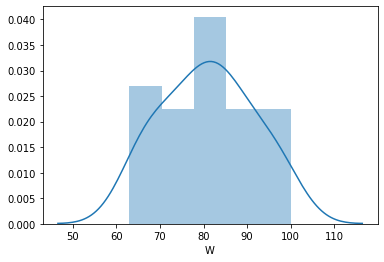

In [30]:
sns.distplot(ds['W'])

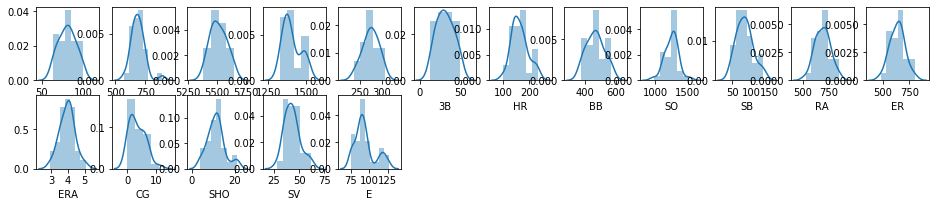

In [31]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(ds[collist[i]])

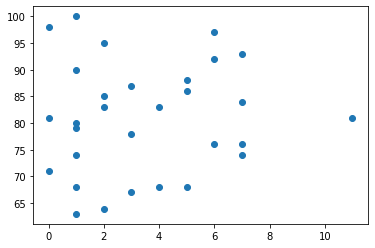

In [32]:
plt.scatter(ds['CG'],ds['W'])

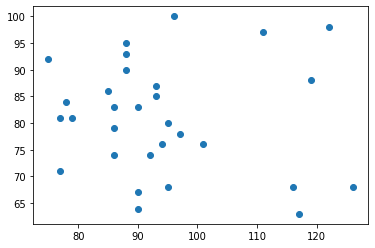

In [33]:
plt.scatter(ds['E'],ds['W'])

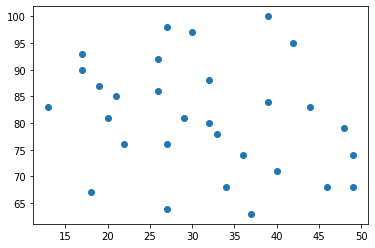

In [34]:
plt.scatter(ds['3B'],ds['W'])

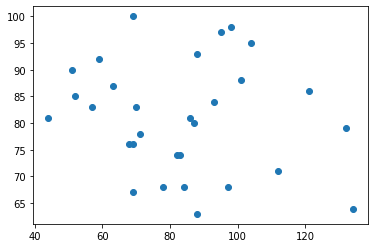

In [35]:
plt.scatter(ds['SB'],ds['W'])

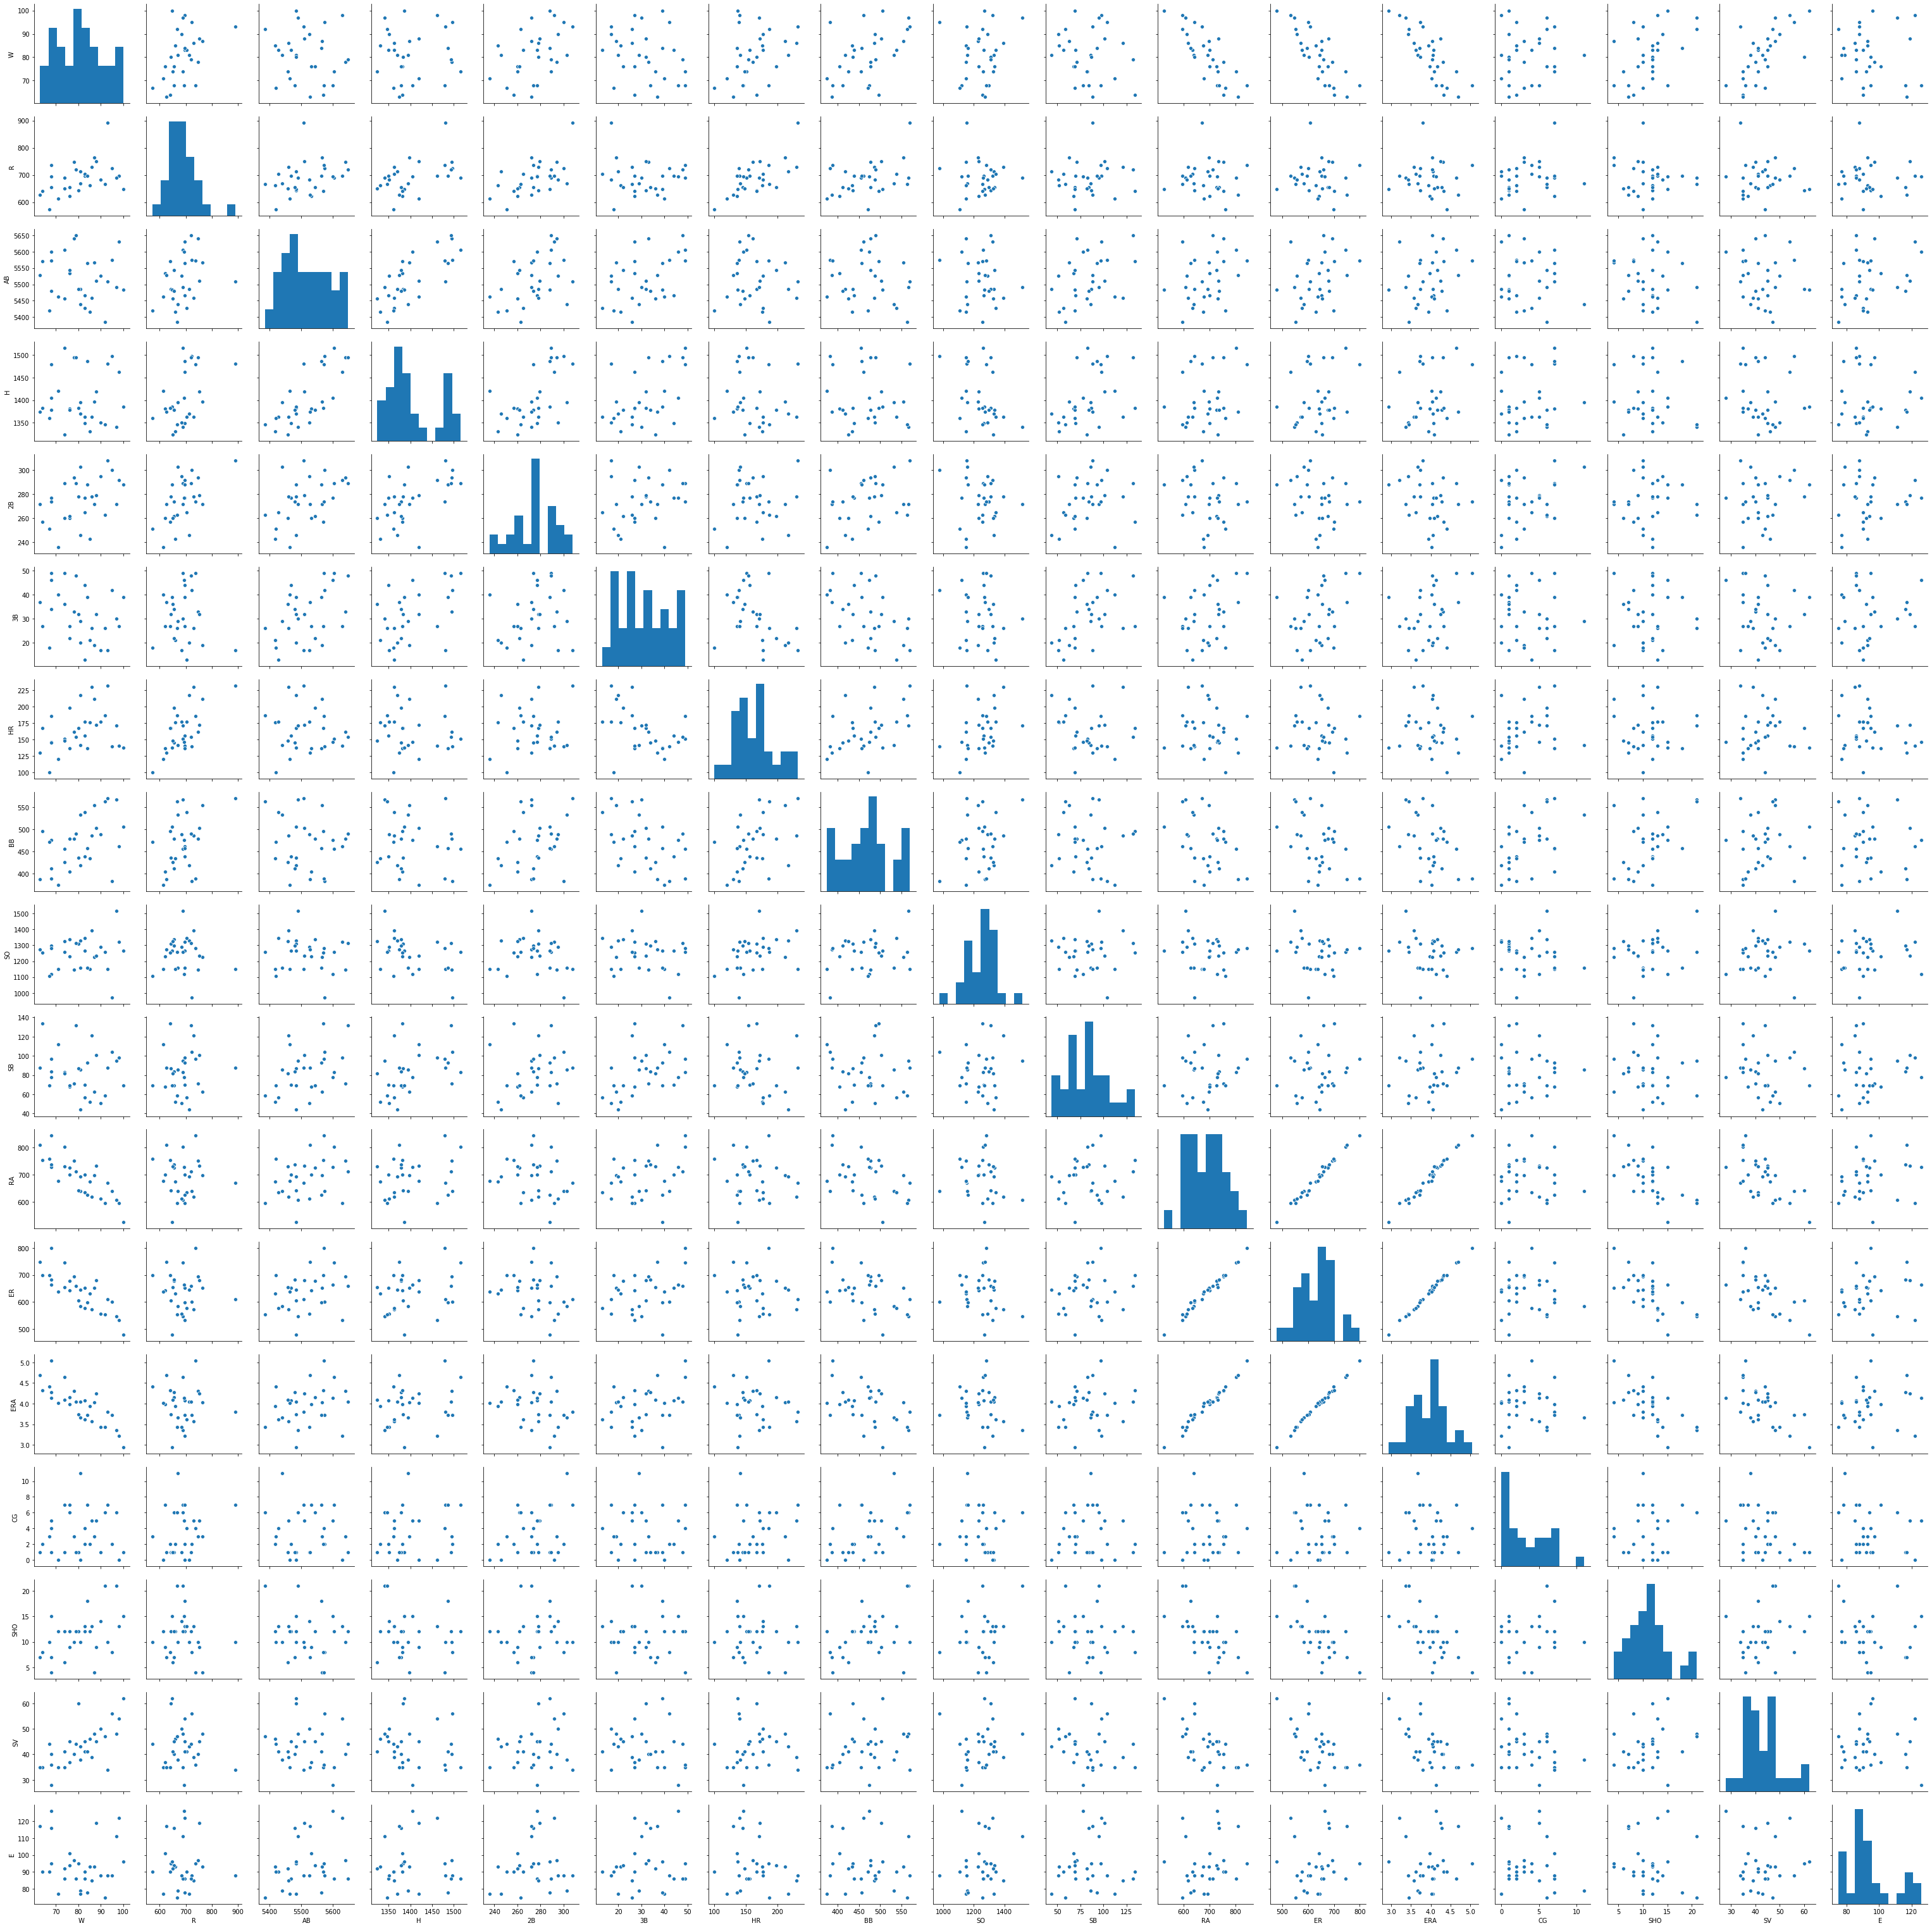

In [36]:
sns.pairplot(ds)

In [37]:
# Drop the negatively correlated values
ds.drop('RA',axis=1,inplace=True)

In [38]:
ds.drop('ER',axis=1,inplace=True)

In [39]:
ds.drop('ERA',axis=1,inplace=True)

In [40]:
ds.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86


In [41]:
ds.shape

(30, 14)

In [42]:
# Removing the Outliers
from scipy.stats import zscore
z=np.abs(zscore(ds))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 5.39806195e-01, 8.14628593e-01,
        1.67160651e+00, 4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 5.39806195e-01, 1.72800005e-01,
        2.49879323e-01, 6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 2.77264091e+00, 3.20914294e-01,
        6.54856158e-01, 1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.01088140e-01,
        8.28122030e-01, 4.18423371e-01, 8.83180700e-01, 1.16053598e+00,
        1.68601848e-01, 6.90984928e-01, 1.30044220e+00, 5.67771443e-01,
        7.841

In [43]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [44]:
z[13][8]

0.8606536207726614

In [45]:
z[15][9]

0.6464052549051131

In [46]:
z[29][12]

0.913352009894743

In [47]:
ds_new=ds[(z<3).all(axis=1)]
ds_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,5,9,45,119


In [48]:
ds.shape

(30, 14)

In [49]:
ds_new.shape

(29, 14)

In [50]:
# 1 row is deleted as an outliers

In [58]:
ds=ds_new
ds.shape

(29, 14)

In [75]:
x=ds.iloc[:,1:]
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,7,12,35,86


In [81]:
y=ds.iloc[:,0:-13]
y.head()

,W
0,95
1,83
2,81
3,76
4,74


In [82]:
x.shape

(29, 13)

In [83]:
y.shape

(29, 1)

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=40)

In [85]:
x_train.shape

(19, 13)

In [86]:
y_train.shape

(19, 1)

In [87]:
x_test.shape

(10, 13)

In [88]:
y_test.shape

(10, 1)

In [89]:
# Applying Linear Regression
lm = LinearRegression()

In [90]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
# Linear coefficient
lm.coef_

array([[ 0.1342484 , -0.03869351, -0.01631394, -0.10537353,  0.2544174 ,
         0.05249734, -0.00785747, -0.02967075,  0.02959121,  0.84562108,
         0.35634576,  0.59900977, -0.0515034 ]])

In [92]:
lm.intercept_

array([245.74259169])

In [93]:
ds.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CG', 'SHO',
       'SV', 'E'],
      dtype='object')

In [94]:
lm.score(x_train,y_train)

0.9820867431142374

In [96]:
# Predict the WINs(W) of BASEBALL
pred=lm.predict(x_test)
print('Predicted Result : ',pred)
print('actual Result',y_test)

Predicted Result :  [[80.78151012]
 [80.75299863]
 [74.71909842]
 [83.41996371]
 [71.77792797]
 [74.71595593]
 [78.04351215]
 [67.63720215]
 [81.54717974]
 [72.61866488]]
actual Result       W
2    81
17   97
20   90
15  100
16   98
14   68
21   83
3    76
29   68
22   71


In [98]:
print('error:')
print('Mean absolute error : ',mean_absolute_error(y_test,pred))

error:
Mean absolute error :  10.974958741314637


In [99]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

-0.27046584259500417


In [106]:
# predict the number of wins by providing the values
t=np.array([0.0055,12.5,22.43,0.99,6.5,7.1,8.1234,2.2,2,3,4,5,8])

In [107]:
t.shape

(13,)

In [108]:
t=t.reshape(1,-1)
t.shape

(1, 13)

In [112]:
lm.predict(t)

array([[253.29120926]])

In [113]:
from sklearn.externals import joblib
joblib.dump(lm,'rf_regressor.pkl')

['rf_regressor.pkl']

In [114]:
# To load the model from pickle file
lm1 = joblib.load('rf_regressor.pkl')

In [115]:
lm1.predict(x_test)

array([[80.78151012],
       [80.75299863],
       [74.71909842],
       [83.41996371],
       [71.77792797],
       [74.71595593],
       [78.04351215],
       [67.63720215],
       [81.54717974],
       [72.61866488]])